In [1]:
# Load Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Main Class Definition
class QMSolver:
    """
    Initialize the QM solver
        Parameters
            - dt:
            - dx:
            - n:
            - steps:
    """
    def __init__(self, dt: float, dx: float, n: int, steps: int) -> None:
        self.dt = dt
        self.dx = dx
        self.N = n
        self.steps = steps
        self.x = None
        self.psi = None
        self.psi_total = None
        self.potential = None
        self.hamiltonian = None

    def create_sho_potential(self):
        self.x = np.linspace(-self.N * self.dx, self.N * self.dx, self.N)
        self.potential = 0.5*self.x**2
        return self.potential

    def create_sw_potential(self):
        self.x = np.linspace(-self.N * self.dx, self.N * self.dx, self.N)
        self.potential = np.zeros(self.N)
        self.potential[0] = np.inf
        self.potential[-1] = np.inf
        return self.potential

    def create_pb_potential(self, width, height):
        self.x = np.linspace(-self.N * self.dx, self.N * self.dx, self.N)
        center = len(self.x) // 2      # Center the barrier
        self.potential = np.zeros(self.N)
        self.potential[center - width // 2:center + width // 2] = height
        return self.potential

    def create_hamiltonian(self):
        """
        Returns:
            Hamiltonian
        """
        # self.x = np.linspace(-self.N * self.dx, self.N * self.dx, self.N)
        # self.potential = np.zeros(self.N)
        h_bar, m = 1, 1
        # Make Hamiltonian Complex Matrix
        c = - h_bar ** 2 / (2 * m * self.dx ** 2)
        self.hamiltonian = np.zeros((self.N, self.N), dtype=complex)
        for i in range(1, self.N - 1):
            # self.hamiltonian[i, i] = 2 * c + 0.5*self.potential[i]**2
            self.hamiltonian[i, i] = 2 * c + self.potential[i]
            self.hamiltonian[i, i + 1] = -c
            self.hamiltonian[i, i - 1] = -c
        # Set Dirichlet Boundary Conditions
        self.hamiltonian[0, 0] = 1e30
        self.hamiltonian[-1, -1] = 1e30
        return self.hamiltonian

    def ic_gaussian(self):
        """
        Returns:
            Initial condition
        """
        self.psi = np.exp(-((self.x**2) / 2))
        self.psi = self.psi / np.sqrt(np.sum(np.abs(self.psi) ** 2) * self.dx)  # Normalize
        return self.psi

    def ic_wave_packet(self, k0 = 1):
        self.psi = (2 / np.pi ** .25) * np.exp(-np.square(self.x) + 1j * k0 * self.x)
        return self.psi

    def solve(self):
        """
        Returns:
            Wave function at all times
        """
        I = np.identity(self.N, dtype=complex)
        # Create matrices A and B
        A = I + (1j / 2) * self.hamiltonian * self.dt
        B = I - (1j / 2) * self.hamiltonian * self.dt
        # Time evolution
        self.psi_total = []
        for n in range(self.steps):
            # Solve the linear system
            self.psi = np.linalg.solve(A, B @ self.psi)
            # Normalize the wave-function
            self.psi = self.psi / np.sqrt(np.sum(np.abs(self.psi) ** 2) * self.dx)
            self.psi_total.append(self.psi)
        return self.psi_total


In [3]:
# Update Figure Parameters
newParams = {'figure.figsize'  : (12, 6),  # Figure size
             'figure.dpi'      : 200,      # figure resolution
             'axes.titlesize'  : 20,       # fontsize of title
             'axes.labelsize'  : 11,       # fontsize of axes labels
             'axes.linewidth'  : 2,        # width of the figure box lines
             'lines.linewidth' : 1,        # width of the plotted lines
             'savefig.dpi'     : 200,      # resolution of a figured saved using plt.savefig(filename)
             'ytick.labelsize' : 11,       # fontsize of tick labels on y axis
             'xtick.labelsize' : 11,       # fontsize of tick labels on x axis
             'legend.fontsize' : 12,       # fontsize of labels in legend
             'legend.frameon'  : True,     # activate frame on lengend
            }
plt.rcParams.update(newParams) # Set new plotting parameters


In [4]:
# Testing the Class
test  = QMSolver(dt=0.001, dx=0.01, n=500, steps=2000)
test.create_sw_potential()
# test.create_sho_potential()
test.create_hamiltonian()
test.ic_wave_packet()
# test.ic_gaussian()
sols = test.solve()

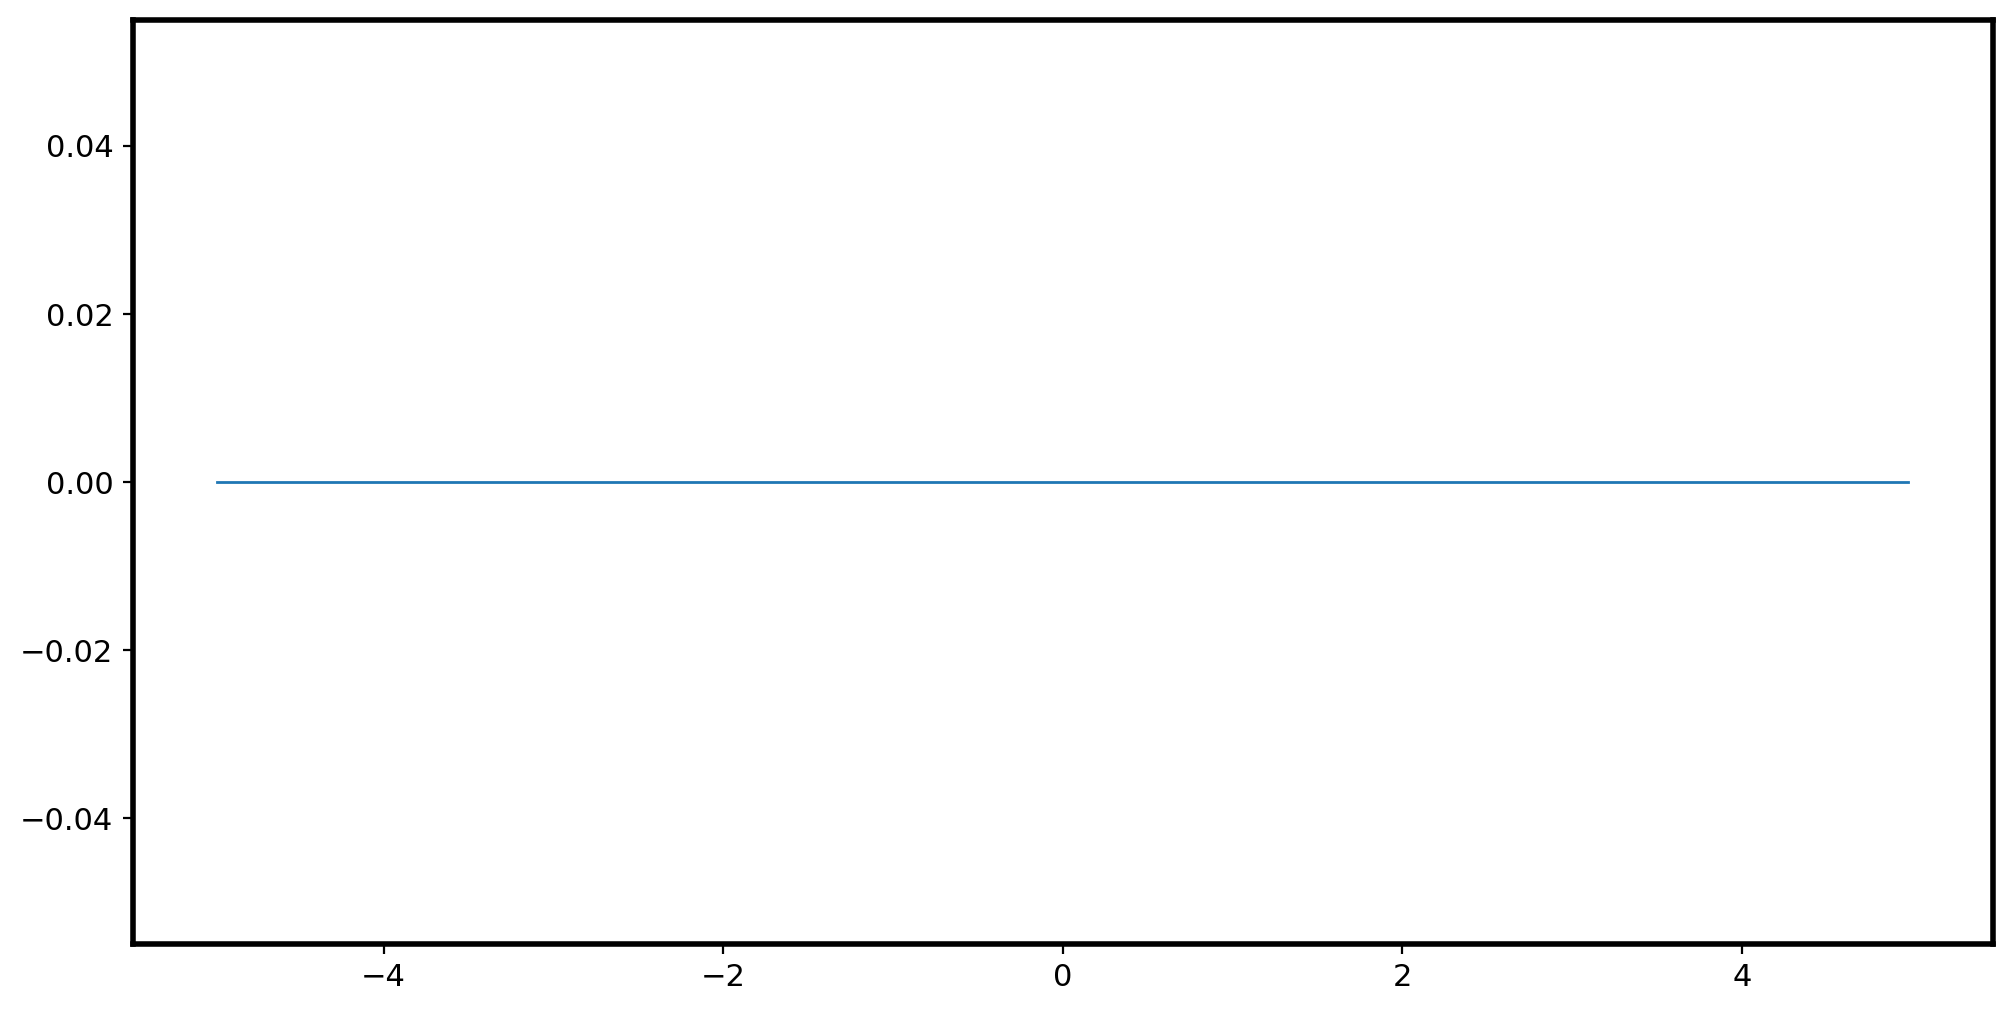

In [5]:
# Plot potential
plt.figure()
plt.plot(test.x, test.potential)
plt.show()

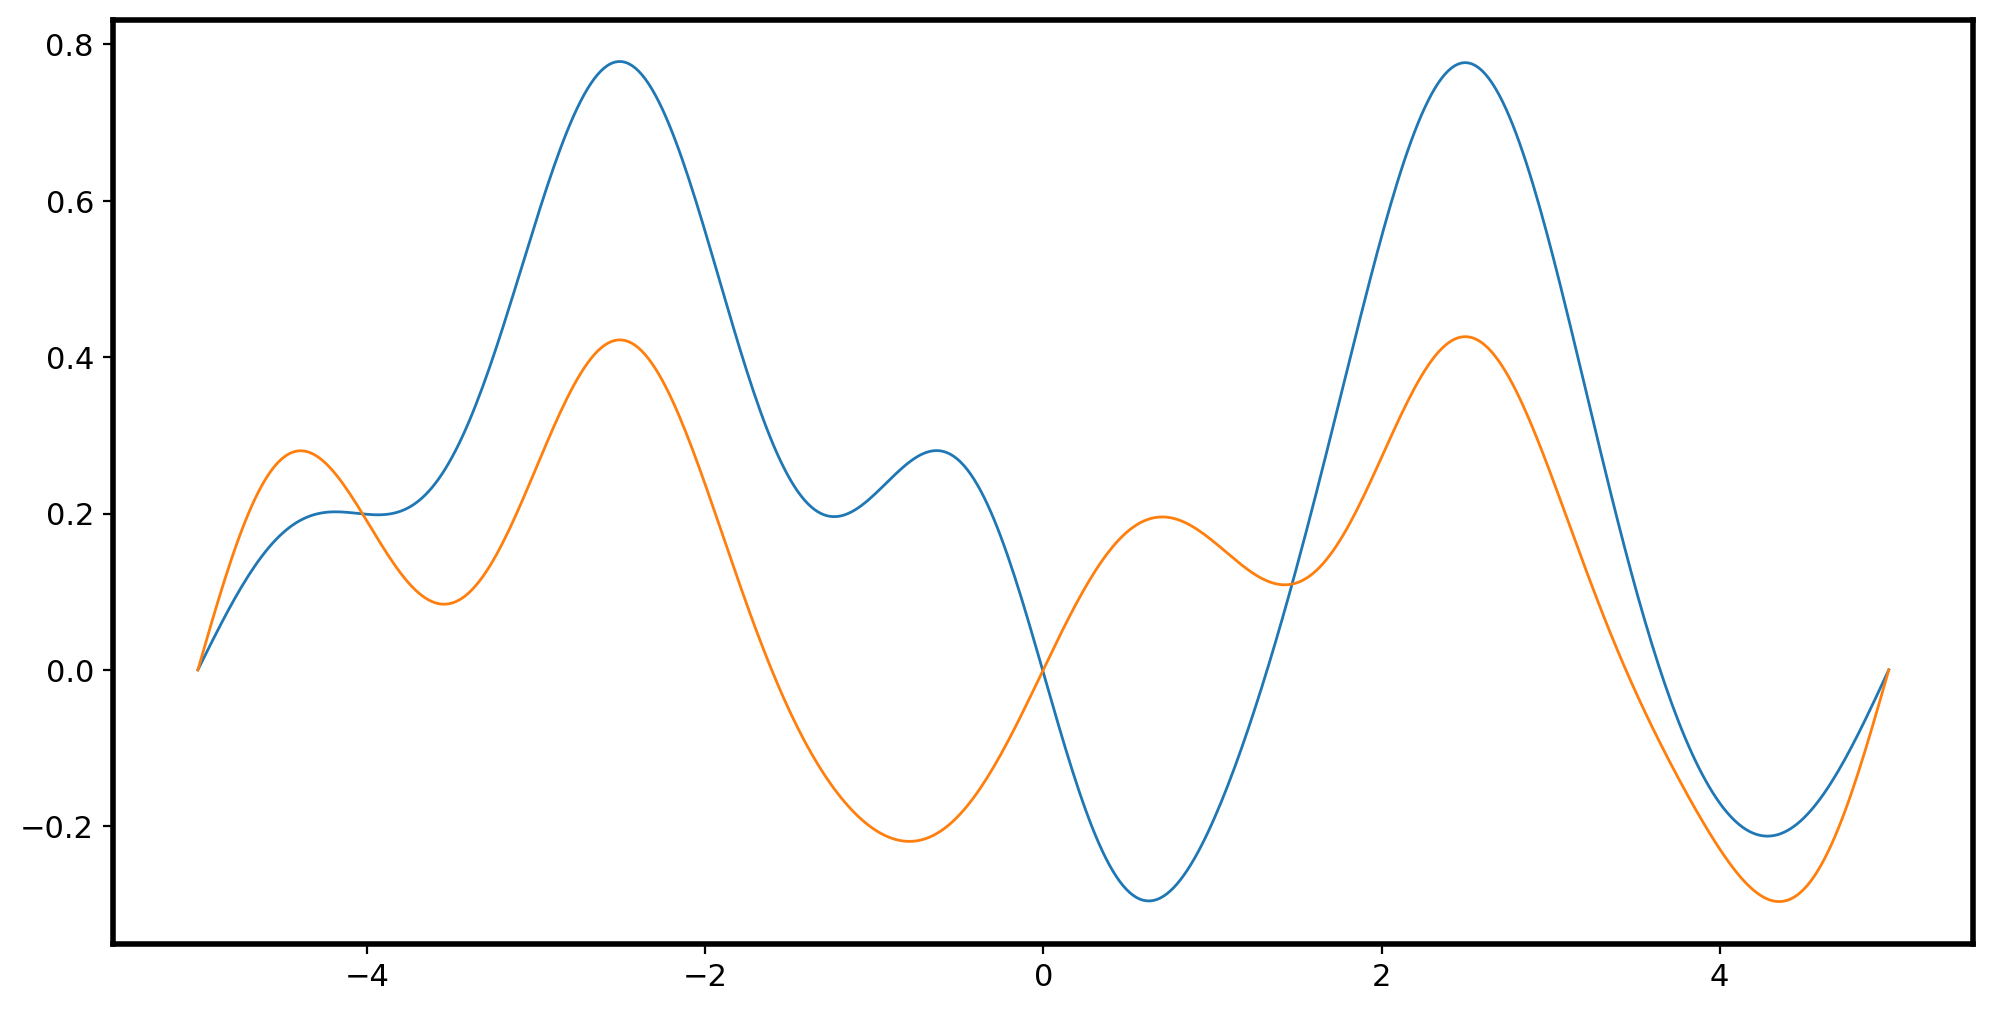

In [6]:
# Plot initial condition
plt.figure()
plt.plot(test.x, np.real(test.psi))
plt.plot(test.x, np.imag(test.psi))
plt.show()

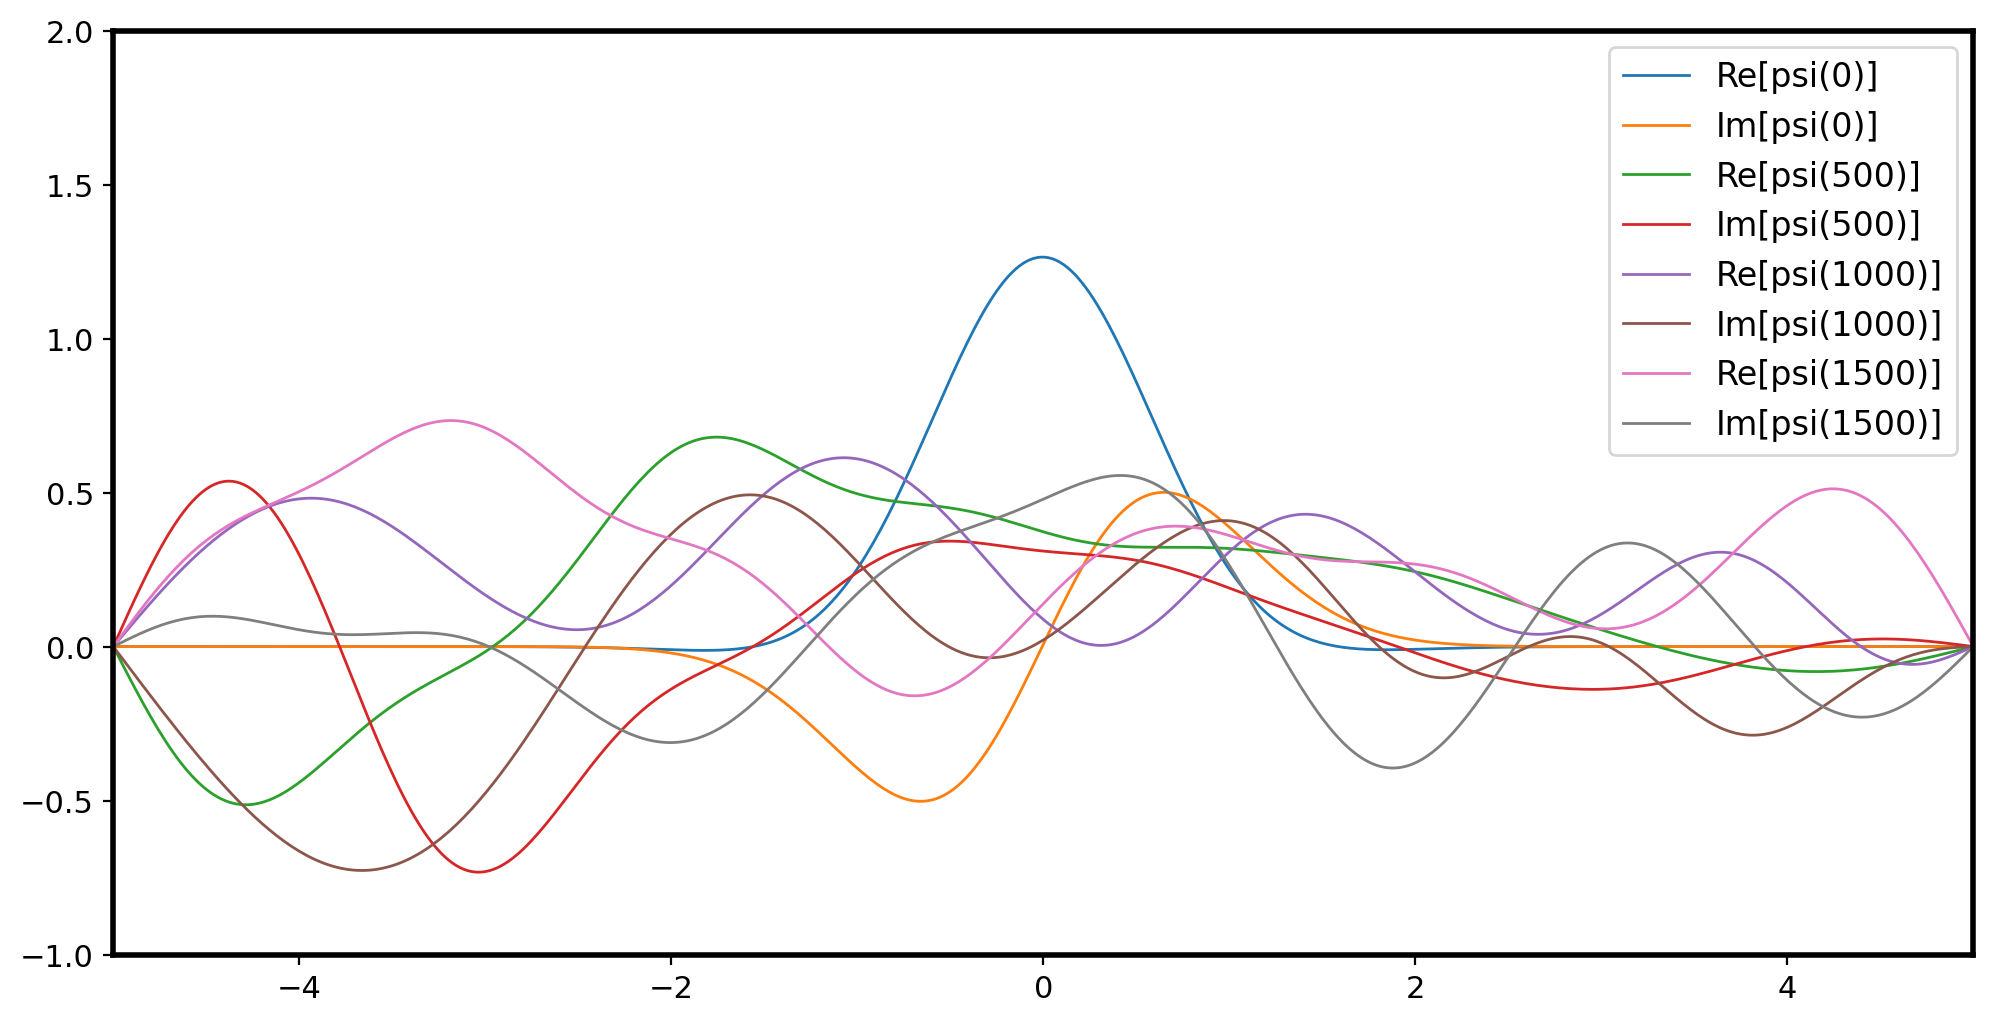

In [7]:
# Plot Solution
plt.figure()
# plt.plot(test.x, test.potential)
for i in range(len(sols)):
    if i % 500 == 0:
        plt.plot(test.x, np.real(sols[i]), label='Re[psi({})]'.format(i))
        plt.plot(test.x, np.imag(sols[i]), label='Im[psi({})]'.format(i))
        plt.legend()
plt.xlim((-5,5))
plt.ylim((-1,2))
plt.show()